In [71]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from operator import itemgetter

%matplotlib inline
plt.style.use('ggplot') #emulate R pretty plotting

### Load data

In [57]:
# read in data set
data = pd.read_csv('data/Hitters.csv', index_col=0).dropna()
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [58]:
dummies = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,False,True,False,True,False,True
-Alvin Davis,True,False,False,True,True,False
-Andre Dawson,False,True,True,False,False,True
-Andres Galarraga,False,True,True,False,False,True
-Alfredo Griffin,True,False,False,True,True,False
...,...,...,...,...,...,...
-Willie McGee,False,True,True,False,False,True
-Willie Randolph,True,False,True,False,True,False
-Wayne Tolleson,True,False,False,True,True,False
-Willie Upshaw,True,False,True,False,True,False


In [59]:
dt = data.drop(['League', 'Division', 'NewLeague'], axis=1)
dt

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [60]:
data=pd.concat([dt, dummies[['League_N','Division_W', 'NewLeague_N']]],axis=1)
data.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000,True,False,True
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500,True,False,True
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000,False,True,False
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000,True,False,False
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000,False,True,False
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000,True,True,True
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000,False,False,False
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143,False,False,False


In [61]:
#get the predictors and response from hitters data
X = data.drop('Salary', axis=1, inplace=False)
y= data.Salary

# list to hold our regression models
regr = []

#alphas 
alphas = 10**np.linspace(-4,2,100)
len(alphas)

100

In [62]:
# build models
for index, alph in enumerate(alphas):
    model = Ridge(alpha=alph,  fit_intercept=True)
    regr.append(model.fit(X,y))

df=pd.Series(data=np.hstack([regr[89].intercept_, regr[89].coef_]),index=["Intercept"]+list(X.columns))

l2_norm_betas = np.sqrt(sum(df.apply(lambda x:x**2).iloc[1:]))
l2_norm_betas

88.59379679870221

In [63]:
regr[69].alpha

1.5199110829529332

Text(0, 0.5, 'Ridge Coeffs')

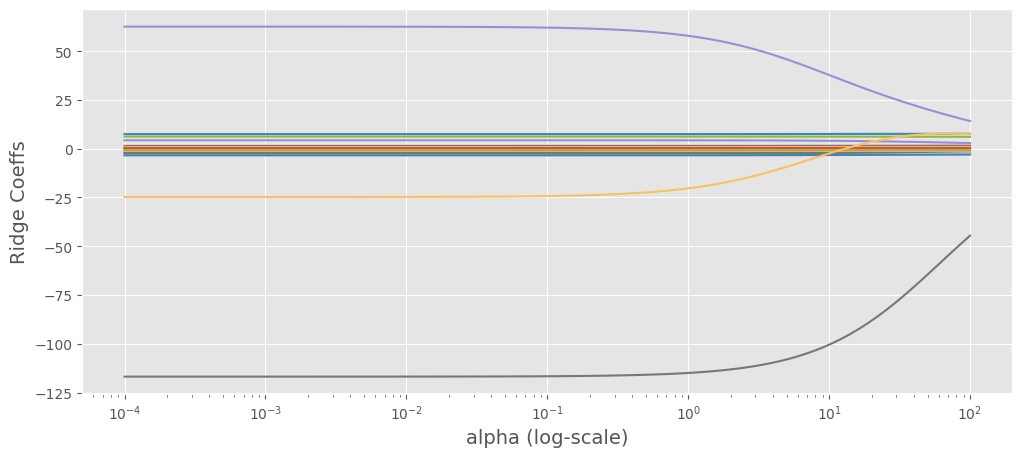

In [73]:
# make a plot of each of the reidge regression coefficients as a function of 
# of the shrinkage fatcor alpha
ridge_coefs = []

for model in regr:
    # print(i,model.coef_[:,np.newaxis])
    ridge_coefs.append(model.coef_)

#plot
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')

ax.set_xlabel('alpha (log-scale)', fontsize=14)
ax.set_ylabel('Ridge Coeffs', fontsize=14)
# ax.legend(X.columns.tolist(),loc='upper center', bbox_to_anchor=(0.5,1.4), ncol=6)


#### The Lasso

In [75]:
grid = 10**np.linspace(-4,2,100)

np.random.seed(0)

# split the data into test and validation sets
train = np.random.choice([True, False], size=len(data))

X_train = X[train]
y_train = y[train]
X_test = X[~train]
y_test = y[~train]

coeffecients = np.empty((len(grid),X.shape[1]))

for index, alpha in enumerate(grid):
    # create model with normalize = False
    lasso = Lasso(alpha=alpha,  max_iter=10000)
    
    # I made a pipeline so that later if I can hunt down the scaling 
    # problems I can easily include a transform of the predictors
    pipeline = Pipeline([('lasso', lasso)])
    
    # fit scaled training data model
    pipeline.fit(X_train, y_train)
    
    coeffecients[index] = lasso.coef_[np.newaxis]

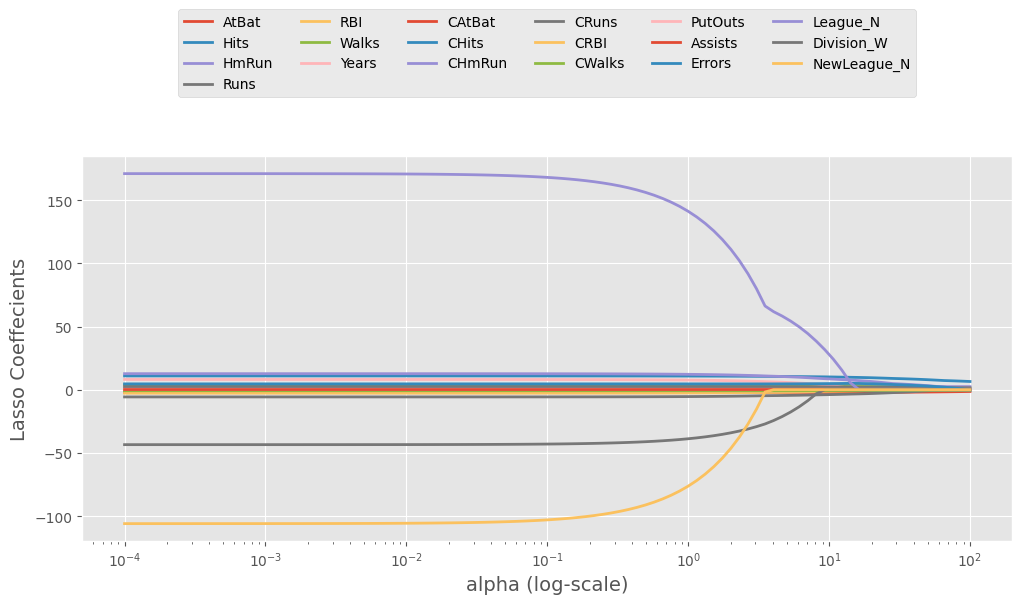

In [76]:
# Make a plot of the coeffecients   
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(grid, coeffecients, linewidth =2.0)

ax.set_xscale('log')
ax.set_xlabel('alpha (log-scale)', fontsize=14)
ax.set_ylabel('Lasso Coeffecients', fontsize=14)
ax.legend(X.columns.tolist(),loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=6)

#### Use cross validation to estimate Test MSE

Min Alpha =  100.0


Text(0.5, 0, 'alpha (log-scale)')

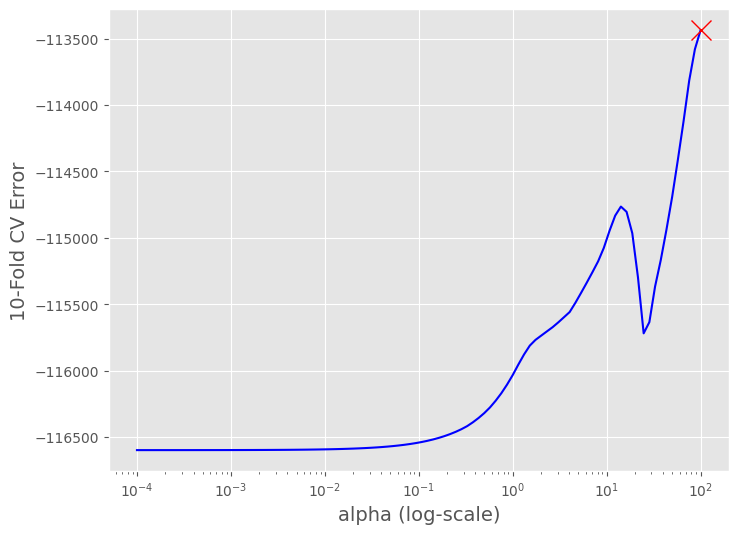

In [88]:
from sklearn.model_selection import cross_val_score
scores = list()
np.random.seed(0)

# compute cross validation using MSE scoring
for alpha in grid:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # create our pipeline for later potential sclaing of predictos
    pipeline = Pipeline(['lasso',lasso])
    
    this_scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=10)
    scores.append(np.mean(this_scores))
# get the minimum alpha
min_index, min_score = max(enumerate(scores), key=itemgetter(1))
print('Min Alpha = ', grid[min_index])

# Plot the CV Errors as a funtion of alpha and plot minimum
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(grid, scores, color='b')
ax.plot(grid[min_index], min_score, marker='x', color='r', markersize=15)

ax.set_xscale('log')
ax.set_ylabel('10-Fold CV Error', fontsize=14)
ax.set_xlabel('alpha (log-scale)', fontsize=14)

In [89]:
coeffecients[min_index]

array([-1.40187781,  6.4908247 ,  0.        , -0.        ,  0.56950109,
        1.18279476,  0.        , -0.0533209 , -0.29690605,  2.41336013,
        1.50198339, -0.12266054, -0.33617854,  0.33717873,  0.13805792,
        0.        ,  0.        , -0.        ,  0.        ])